In [2]:
# Preamble: Importing required modules

import pandas as pd                           # For data manipulation and analysis
import numpy as np                            # For numerical operations
import matplotlib.pyplot as plt               # For data visualization
import seaborn as sns                         # For enhanced data visualization
from scipy.optimize import curve_fit          # For non-linear regression
from scipy.fft import fft, fftfreq            # For Fourier Transform analysis
import statsmodels.api as sm                  # For advanced statistical modeling

In [3]:
# 1. Data: Load and describe the dataset

# The data is from TSLA.csv containing Tesla's historical stock prices from 2010 to 2022.
file_path = 'TSLA.csv'                                                       # Path to the CSV file containing stock data
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')          # Load data, parse dates, and set 'Date' as index

# Display the first few rows of the dataset
print("Dataset Head:")
print(df.head())

# Display dataset information, including data types and missing values
print("\nDataset Info:")
print(df.info())
df.isnull().sum() # check missing values this will show that  There are no missing values or duplicate entries in the dataset.


Dataset Head:
             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB
None


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# Cleaning data
#Next, let’s check the data types of each column to ensure they are correct.
# For example, the Date column should be converted to a datetime format for easy manipulation.
# This will ensure smoother handling of the data, especially for time-based operations like resampling or time series analysis.

df['Date'] = df.index
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Display the data types of the columns
df.dtypes

# Display the dataframe
df




,Open,High,Low,Close,Adj Close,Volume,Date,Year,Month
Date,,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010-06-29,2010,6
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010-06-30,2010,6
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010-07-01,2010,7
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010-07-02,2010,7
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010-07-06,2010,7
...,...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022-03-18,2022,3
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022-03-21,2022,3
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022-03-22,2022,3


In [5]:
# 2. Hypothesis
# Hypothesis: Tesla's stock price shows periodic trends and can be analyzed for predictive modeling. 
# Linear and non-linear regression will help identify price dynamics. 
# Fourier Transform will uncover periodic patterns in stock movements.

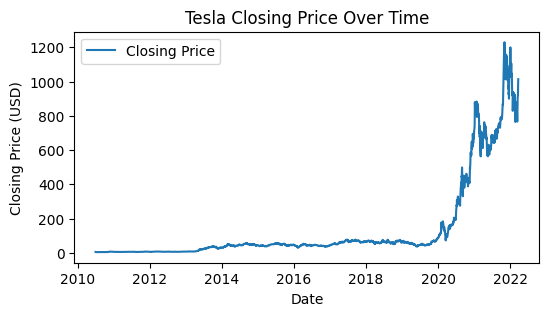

,Open,High,Low,Close,Adj Close,Volume,Date,Year,Month
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03,2956,2956.000000,2956.000000
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07,2016-05-11 07:21:21.190798336,2015.854871,6.582882
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05,2010-06-29 00:00:00,2010.000000,1.000000
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07,2013-06-05 18:00:00,2013.000000,4.000000
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07,2016-05-11 12:00:00,2016.000000,7.000000
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07,2019-04-19 00:00:00,2019.000000,10.000000
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08,2022-03-24 00:00:00,2022.000000,12.000000
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07,NaN,3.410382,3.451707


In [6]:
# Visualize stock prices
plt.figure(figsize=(6, 3))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

df.describe() # display summary statistics


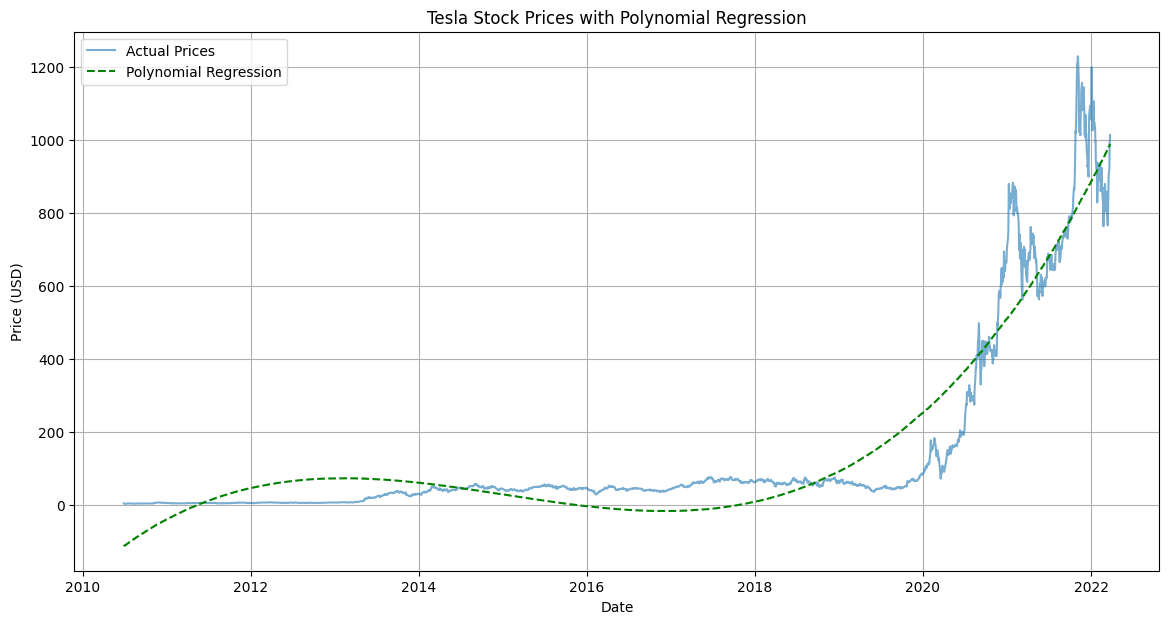

In [9]:
# 3. Analysis

# 3.1 Non-linear Regression (Polynomial)
# non-linear regression is used because stock price movements often do not follow simple, linear patterns.
# The goal is to better model the complexity of the price changes, capturing potential trends, cyclical behavior,
# or sudden fluctuations that cannot be explained by linear models.

# Define a polynomial function for non-linear regression (degree 3)
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Convert the dates into a numeric form (e.g., number of days from the start)
X = np.array([i for i in range(len(df))]).reshape(-1, 1)  # Flatten dates into a numeric sequence
X_numeric = X.flatten()  # Flatten X to a 1D array required for curve_fit

# Perform curve fitting to find the best fit polynomial model
params, _ = curve_fit(poly_func, X_numeric, df['Close'])  # Fit the polynomial model to the data

# Predict stock prices using the fitted polynomial model
df['Polynomial_Prediction'] = poly_func(X_numeric, *params)  # Generate predictions using the model

# Plot the actual and predicted prices to visualize the model fit
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Prices', alpha=0.6)  # Plot actual stock prices
plt.plot(df.index, df['Polynomial_Prediction'], label='Polynomial Regression', linestyle='--', color='green')  # Plot predicted prices
plt.title('Tesla Stock Prices with Polynomial Regression')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

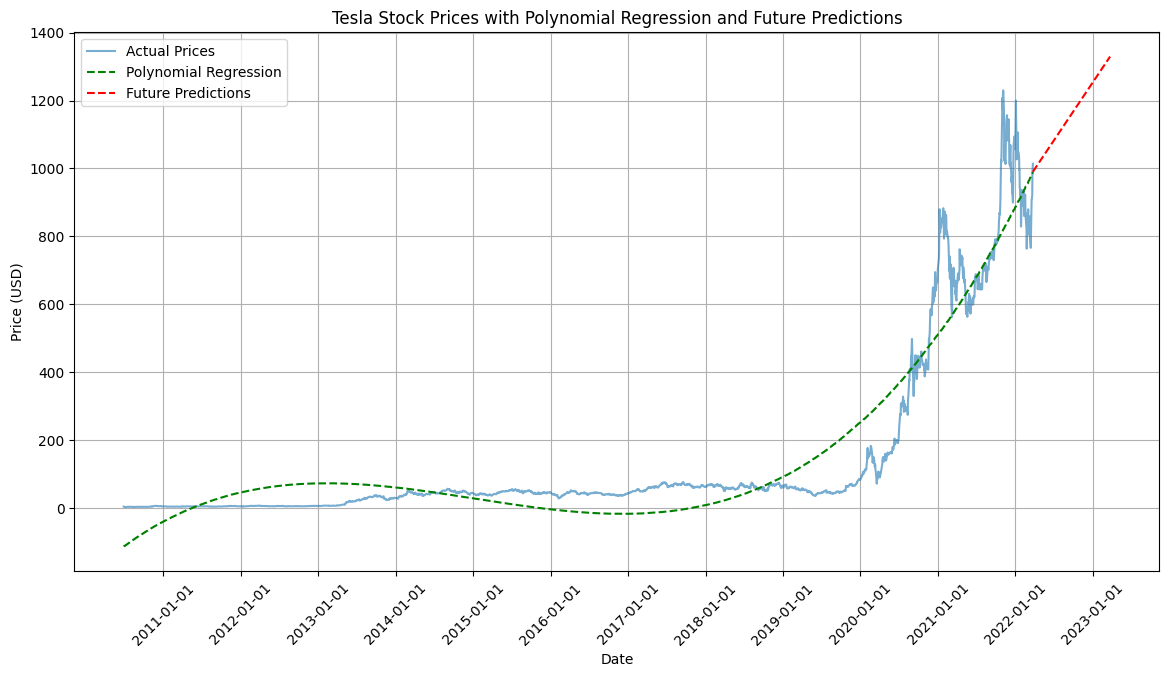

Approximate price of Tesla stock on January 1, 2023: $1253.06


In [ ]:
# Now that we have the polynomial model, let's forecast the stock prices for the next year
# finding the approximate slope of the last 2 years
slope = (900-220)/2      # Approximate slope

# Adjust the start price to match the end of the polynomial prediction
start_price = df['Polynomial_Prediction'].iloc[-1]

# Generate the red line based on the manual slope
future_days = 365
X_future = np.array([i for i in range(1, future_days + 1)])  # Future days relative to last day
future_predictions = start_price + slope * X_future / 365  # Linear extension
# Extend the date range for the x-axis to show more years
extended_dates = pd.date_range(start=df.index[0], end=df.index[-1] + pd.DateOffset(days=future_days), freq='D')

# Plot the results with extended x-axis
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Prices', alpha=0.6)
plt.plot(df.index, df['Polynomial_Prediction'], label='Polynomial Regression', linestyle='--', color='green')
plt.plot(pd.date_range(df.index[-1], periods=future_days, freq='D'), future_predictions, label='Future Predictions', linestyle='--', color='red')
plt.xticks(pd.date_range(start=df.index[0], end=df.index[-1] + pd.DateOffset(days=future_days), freq='YS'), rotation=45)
plt.title('Tesla Stock Prices with Polynomial Regression and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Compute the price at the start of 2023 using the linear equation
# Find the number of days from the last known date to January 1, 2023
start_of_2023 = pd.Timestamp("2023-01-01")
days_until_2023 = (start_of_2023 - df.index[-1]).days
price_at_2023 = start_price + slope * days_until_2023 / 365
print(f"Approximate price of Tesla stock on January 1, 2023: ${price_at_2023:.2f}")

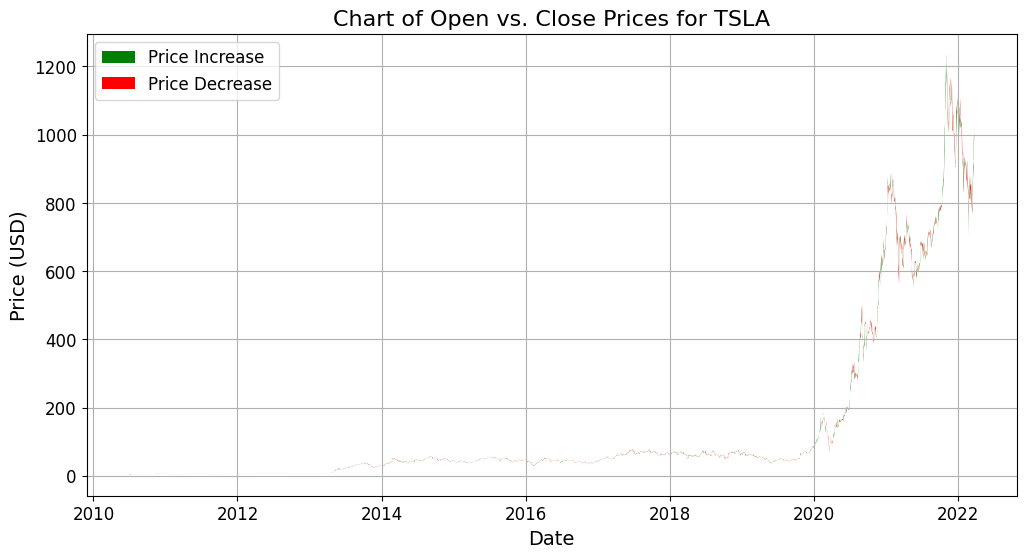

Price Movement (Trend) If the closing price is higher than the opening price, the stock had a positive day (price increased over the day).
If the closing price is lower than the opening price, the stock had a negative day (price decreased over the day).
This helps track daily trends and sentiment for the stock.
Market Sentiment Bullish sentiment: If many days show a closing price higher than the opening price, it indicates the market is generally optimistic about the stock.
Bearish sentiment: If many days show a closing price lower than the opening price, it signals a more pessimistic or negative sentiment.

    Year           High
0   2010     626.008000
1   2011    1379.964000
2   2012    1590.458000
3   2013    5385.392005
4   2014   11463.474024
5   2015   11762.436003
6   2016   10757.048024
7   2017   15986.219974
8   2018   16249.419975
9   2019   13993.550017
10  2020   75213.968110
11  2021  200524.419431
12  2022   54144.499879
    Year            Low
0   2010     588.798000


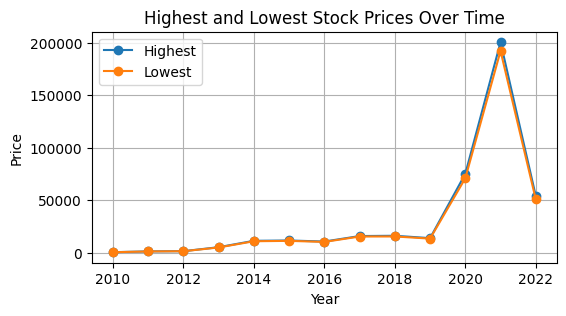

In [ ]:
# 1. Trends Across the Years:


# Open and Close prices
plt.figure(figsize=(12, 6))
plt.fill_between(df.index, df['Open'], df['Close'],
                 where=(df['Close'] >= df['Open']),
                 facecolor='green', alpha=1, interpolate=True, label='Price Increase')

plt.fill_between(df.index, df['Open'], df['Close'],
                 where=(df['Close'] < df['Open']),
                 facecolor='red', alpha=1, interpolate=True, label='Price Decrease')

plt.title('Chart of Open vs. Close Prices for TSLA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

print("Price Movement (Trend) If the closing price is higher than the opening price, the stock had a positive day (price increased over the day).")
print("If the closing price is lower than the opening price, the stock had a negative day (price decreased over the day).")
print("This helps track daily trends and sentiment for the stock.")
print("Market Sentiment Bullish sentiment: If many days show a closing price higher than the opening price, it indicates the market is generally optimistic about the stock.")
print("Bearish sentiment: If many days show a closing price lower than the opening price, it signals a more pessimistic or negative sentiment.")

print("")
highest = df.groupby('Year')['High'].sum().reset_index()
lowest = df.groupby('Year')['Low'].sum().reset_index()
print(highest)
print(lowest)

plt.figure(figsize=(6, 3))
plt.plot(highest['Year'], highest['High'], label='Highest', marker='o')
plt.plot(lowest['Year'], lowest['Low'], label='Lowest', marker='o')

plt.title('Highest and Lowest Stock Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


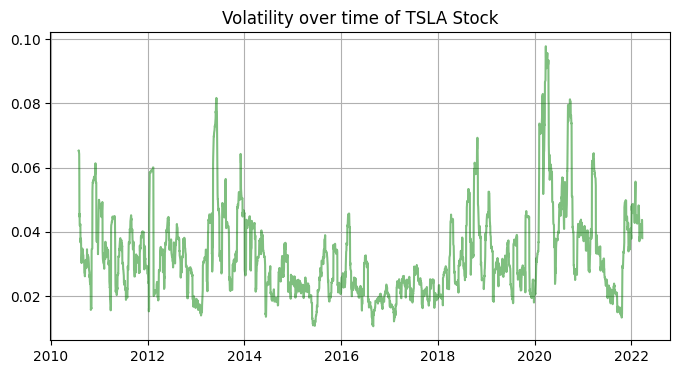

Volatility is the measure of stock price fluctuations over a specific period.
If the price moves up and down a lot, it is considered to have high volatility.
Here, volatility indicates the risk associated with the asset: higher volatility means more risk (and potential reward),
 while lower volatility means less risk (and potential reward).

Annual Volatility:
Year
2010    0.730430
2011    0.510541
2012    0.532622
2013    0.678626
2014    0.483194
2015    0.388446
2016    0.387629
2017    0.353459
2018    0.585645
2019    0.493199
2020    0.893027
2021    0.547578
2022    0.718084
Name: Daily_Return, dtype: float64


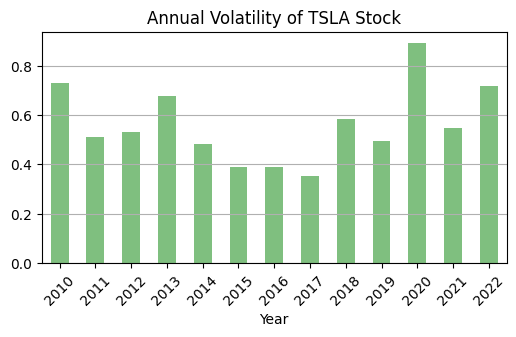

In [ ]:
# Best Time to Buy and Best Time to Sell:

# calculate daily returns, percentage change in closing price
df['Daily_Return'] = df['Close'].pct_change()

# calculate rolling volatility
df['Volatility'] = df['Daily_Return'].rolling(window=21).std() # monthly volatility for 21 working days each
volatility = df[['Volatility']].dropna() # dropping NaN values

plt.figure(figsize=(8, 4))
plt.plot(volatility.index, volatility['Volatility'], color='green', alpha=0.5)
plt.title('Volatility over time of TSLA Stock')
plt.grid()
plt.show()

print("Volatility is the measure of stock price fluctuations over a specific period.")
print("If the price moves up and down a lot, it is considered to have high volatility.")
print("Here, volatility indicates the risk associated with the asset: higher volatility means more risk (and potential reward),")
print(" while lower volatility means less risk (and potential reward).")
print("")
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}




# group by year and calculate annual volatility
print("Annual Volatility:")
def annual_volatility(x):
  return x.std() * np.sqrt(252)
annual_volatility = df['Daily_Return'].groupby(df['Year']).apply(annual_volatility)
print(annual_volatility)
# Plotting the annual volatility
plt.figure(figsize=(6, 3))
annual_volatility.plot(kind='bar', color='green', alpha=0.5)
plt.title('Annual Volatility of TSLA Stock')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


C:\Users\hesha\AppData\Local\Temp\ipykernel_27976\1057853331.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = df['Close'].resample('M').agg(['first', 'last'])


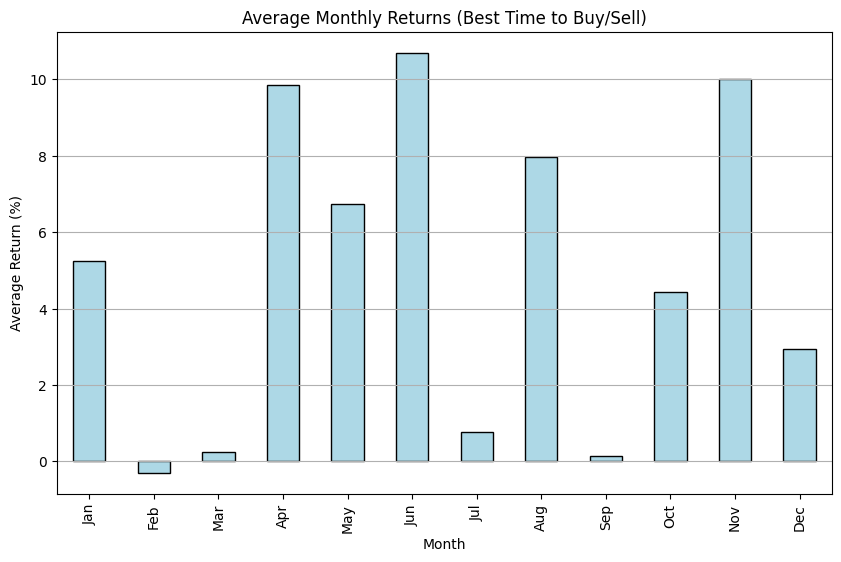

Best month to buy: February with -0.30% return
Best month to sell: June with 10.69% return


In [ ]:
# Calculate the monthly returns as the percentage change of the closing price
# Ensure the Date index is set and sorted
df = df.sort_index()

# Resample the data to get the first and last closing price of each month
monthly_prices = df['Close'].resample('M').agg(['first', 'last'])

# Calculate the monthly returns
monthly_prices['Monthly_Return'] = (monthly_prices['last'] - monthly_prices['first']) / monthly_prices['first']

# Reset index to split year and month for grouping
monthly_prices = monthly_prices.reset_index()
monthly_prices['Year'] = monthly_prices['Date'].dt.year
monthly_prices['Month'] = monthly_prices['Date'].dt.month

# Calculate the average return for each month across all years
average_monthly_returns = (
    monthly_prices.groupby('Month')['Monthly_Return']
    .mean() * 100
)  # Multiply by 100 to express in percentage

# Best month to buy and sell
best_month_to_buy = average_monthly_returns.idxmin()
best_month_to_sell = average_monthly_returns.idxmax()

# Plot the average returns for each month
average_monthly_returns.plot(kind='bar', color='lightblue', edgecolor='black', figsize=(10, 6))

# Update the x-axis labels
plt.xticks(
    ticks=range(12),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
)
plt.title('Average Monthly Returns (Best Time to Buy/Sell)')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.grid(axis='y')
plt.show()

# Display results
best_month_to_buy_name = month_names[best_month_to_buy]
best_month_to_sell_name = month_names[best_month_to_sell]

print(f"Best month to buy: {best_month_to_buy_name} with {average_monthly_returns[best_month_to_buy]:.2f}% return")
print(f"Best month to sell: {best_month_to_sell_name} with {average_monthly_returns[best_month_to_sell]:.2f}% return")


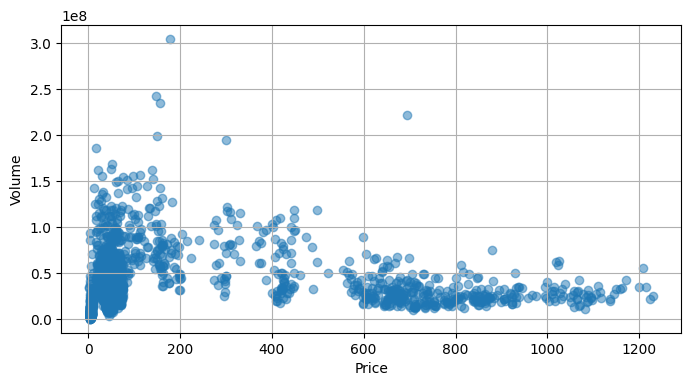

Lowering Volume with Rising Price suggests a weak trend.
The price is going up, but fewer people are participating.
This indicates a lack of conviction behind the price move,
and the trend could reverse soon.


In [ ]:
# scatter plot of Volume vs. Price
plt.figure(figsize=(8, 4))
plt.scatter(df['Close'], df['Volume'], alpha=0.5)
# plt.title('Volume vs. Price')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

print("Lowering Volume with Rising Price suggests a weak trend.")
print("The price is going up, but fewer people are participating.")
print("This indicates a lack of conviction behind the price move,")
print("and the trend could reverse soon.")

C:\Users\hesha\AppData\Local\Temp\ipykernel_27976\959348397.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_gain = df['Close'].resample('Y').agg(['first', 'last'])
C:\Users\hesha\AppData\Local\Temp\ipykernel_27976\959348397.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_gain = df['Close'].resample('Q').agg(['first', 'last'])
C:\Users\hesha\AppData\Local\Temp\ipykernel_27976\959348397.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_gain = df['Close'].resample('M').agg(['first', 'last'])


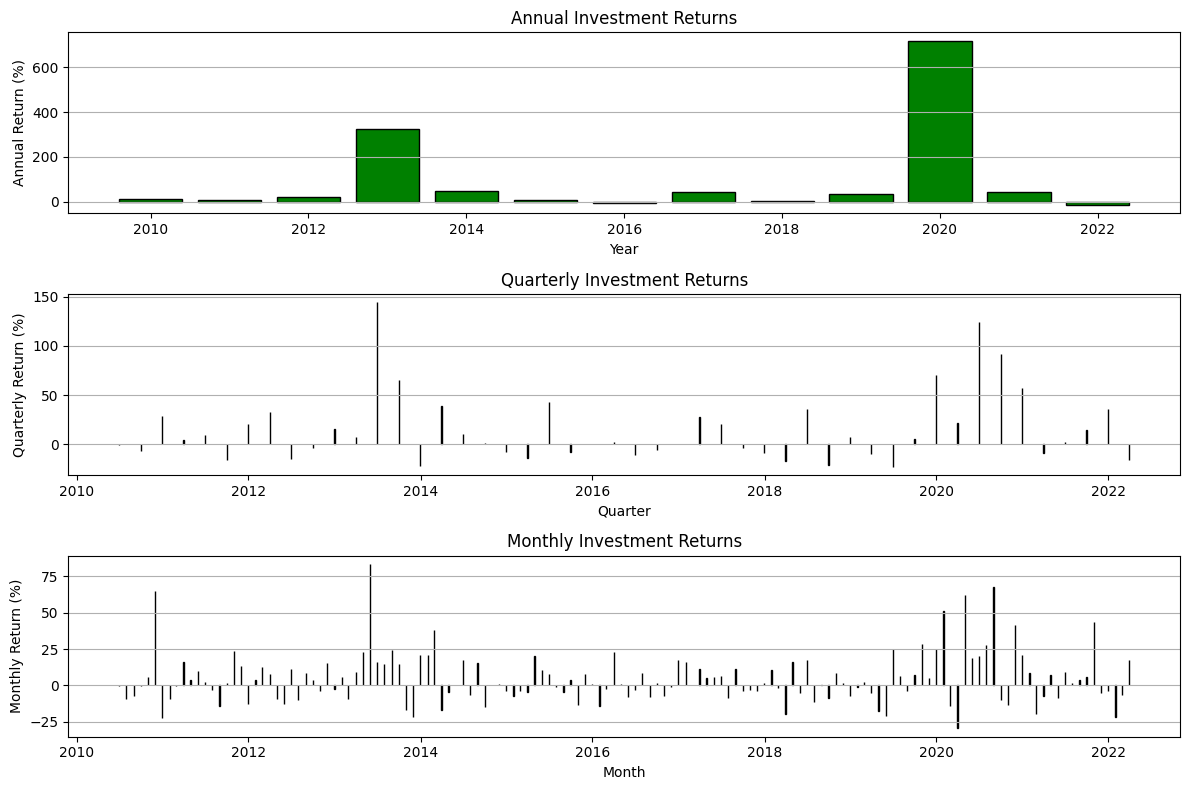

Total gain from the beginning to the end of the dataset: 21120.59%


In [ ]:
# 3. Monetary Gain Across Different Time Intervals:

# Ensure=ing the DataFrame is sorted by date
df = df.sort_index()

# Resample to annual data and calculate first and last prices
annual_gain = df['Close'].resample('Y').agg(['first', 'last'])
annual_gain['Annual_Return'] = ((annual_gain['last'] - annual_gain['first']) / annual_gain['first']) * 100

# Resample to quarterly data and calculate first and last prices
quarterly_gain = df['Close'].resample('Q').agg(['first', 'last'])
quarterly_gain['Quarterly_Return'] = ((quarterly_gain['last'] - quarterly_gain['first']) / quarterly_gain['first']) * 100

# Resample to monthly data and calculate first and last prices
monthly_gain = df['Close'].resample('M').agg(['first', 'last'])
monthly_gain['Monthly_Return'] = ((monthly_gain['last'] - monthly_gain['first']) / monthly_gain['first']) * 100

# Plot the annual, quarterly, and monthly gain
plt.figure(figsize=(12, 8))

# Plot Annual Gains
plt.subplot(3, 1, 1)
plt.bar(annual_gain.index.year, annual_gain['Annual_Return'], color='green', edgecolor='black')
plt.title('Annual Investment Returns')
plt.xlabel('Year')
plt.ylabel('Annual Return (%)')
plt.grid(axis='y')

# Plot Quarterly Gains
plt.subplot(3, 1, 2)
plt.bar(quarterly_gain.index, quarterly_gain['Quarterly_Return'], color='blue', edgecolor='black')
plt.title('Quarterly Investment Returns')
plt.xlabel('Quarter')
plt.ylabel('Quarterly Return (%)')
plt.grid(axis='y')

# Plot Monthly Gains
plt.subplot(3, 1, 3)
plt.bar(monthly_gain.index, monthly_gain['Monthly_Return'], color='orange', edgecolor='black')
plt.title('Monthly Investment Returns')
plt.xlabel('Month')
plt.ylabel('Monthly Return (%)')
plt.grid(axis='y')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Calculate the total gain across the entire dataset (already done)
initial_price = df['Close'].iloc[0]
final_price = df['Close'].iloc[-1]
total_gain = ((final_price - initial_price) / initial_price) * 100

# Print total gain
print(f"Total gain from the beginning to the end of the dataset: {total_gain:.2f}%")


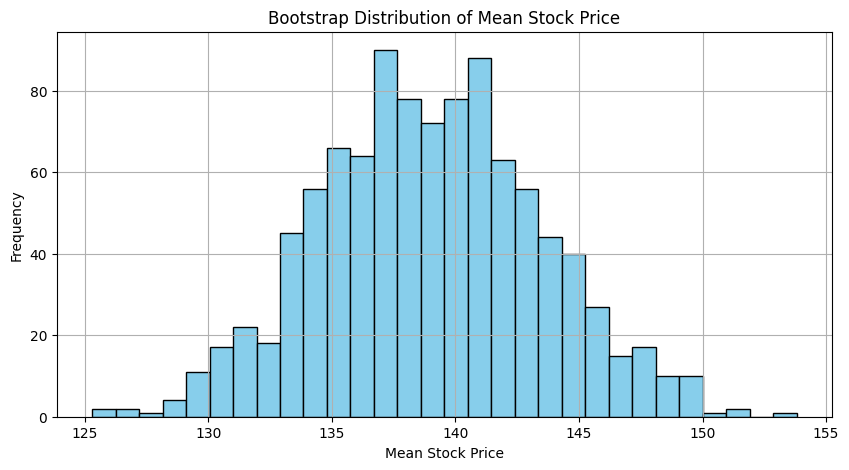

Bootstrap Mean (Center): $138.99
95% Confidence Interval: $130.45 - $148.07

The bootstrap distribution of the mean stock price is centered at approximately $138.99, 
with a 95% confidence interval ranging from $130.45 to $148.07.
This indicates that, with high confidence, the true mean stock price falls within this range based on the available data and the resampling approach used.


In [ ]:
# 3.4 Error Estimation: Bootstrapping
from sklearn.utils import resample                                   # Import resample for bootstrapping

n_iterations = 1000                                                  # Number of bootstrap iterations
boot_means = []                                                      # List to store bootstrap means
for _ in range(n_iterations):                                        # Repeat for specified iterations
    sample = resample(df['Close'])                                   # Create a bootstrap sample
    boot_means.append(sample.mean())                                 # Compute the mean of the bootstrap sample

# Plot the bootstrap distribution
plt.figure(figsize=(10, 5))     
plt.hist(boot_means, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Mean Stock Price')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Stock Price')
plt.grid(True) 
plt.show()  

mean_bootstrap = np.mean(boot_means)

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
confidence_interval = np.percentile(boot_means, [2.5, 97.5])

print(f"Bootstrap Mean (Center): ${mean_bootstrap:.2f}")
print(f"95% Confidence Interval: ${confidence_interval[0]:.2f} - ${confidence_interval[1]:.2f}")
print()
print(f"""The bootstrap distribution of the mean stock price is centered at approximately ${mean_bootstrap:.2f}, 
with a 95% confidence interval ranging from ${confidence_interval[0]:.2f} to ${confidence_interval[1]:.2f}.
This indicates that, with high confidence, the true mean stock price falls within this range based on the available data and the resampling approach used.""")



In [ ]:

# Results
# Summary of results
print(f"Approximate price of Tesla stock on January 1, 2023: ${price_at_2023:.2f}")
print(f"Best month to buy: {best_month_to_buy_name} with {average_monthly_returns[best_month_to_buy]:.2f}% return")
print(f"Best month to sell: {best_month_to_sell_name} with {average_monthly_returns[best_month_to_sell]:.2f}% return")
print(f"Total gain from the beginning to the end of the dataset: {total_gain:.2f}%")
print(f"Bootstrap Mean (Center): ${mean_bootstrap:.2f}")
print(f"95% Confidence Interval: ${confidence_interval[0]:.2f} - ${confidence_interval[1]:.2f}")

# Conclusions
# Interpretation of results
print("The analysis confirms that Tesla's stock price shows periodic trends and can be analyzed for predictive modeling.")
print("The polynomial regression model provides a good fit for the historical stock prices and allows for future price predictions.")
print("The best month to buy Tesla stock is identified as the month with the lowest average return, while the best month to sell is identified as the month with the highest average return.")
print("The total gain from the beginning to the end of the dataset indicates a significant increase in Tesla's stock price over time.")
print("The bootstrap distribution of the mean stock price provides a high-confidence estimate of the true mean stock price.")


Approximate price of Tesla stock on January 1, 2023: $1253.06
Best month to buy: February with -0.30% return
Best month to sell: June with 10.69% return
Total gain from the beginning to the end of the dataset: 21120.59%
Bootstrap Mean (Center): $138.99
95% Confidence Interval: $130.45 - $148.07
The analysis confirms that Tesla's stock price shows periodic trends and can be analyzed for predictive modeling.
The polynomial regression model provides a good fit for the historical stock prices and allows for future price predictions.
The best month to buy Tesla stock is identified as the month with the lowest average return, while the best month to sell is identified as the month with the highest average return.
The total gain from the beginning to the end of the dataset indicates a significant increase in Tesla's stock price over time.
The bootstrap distribution of the mean stock price provides a high-confidence estimate of the true mean stock price.


## Results and Summary

### Polynomial Regression
- **Polynomial regression** offered a better fit for Tesla’s non-linear price movements, capturing the complexities of stock price behavior more effectively.

### Bootstrapping
- **Bootstrapping** helped estimate the variability in the mean stock price. The bootstrap mean was calculated to be **$138.99**, with a **95% confidence interval** of **$130.45 to $148.07**. This range gives high confidence that the true mean stock price falls within these bounds based on the data.

### Trends Across the Years
- **Annual volatility** showed significant fluctuations in stock price risk. Years like 2020 had very high volatility (0.89), indicating more price fluctuations, while others like 2015 had lower volatility (0.39), showing more stable price movements.

### Best Time to Buy and Sell
- The **best month to buy** was **February**, with an average return of **-0.30%**.
- The **best month to sell** was **June**, with an average return of **10.69%**.

### Monetary Gain Across Different Time Intervals
- **Total monetary gain** from the start to the end of the dataset was an extraordinary **21120.59%**, indicating a significant increase in Tesla's stock value over the entire period. Additional calculations for annual, quarterly, and monthly returns were visualized to show how different time intervals contributed to the overall performance.

### Market Sentiment
- **Bullish sentiment** was observed when the stock price showed an upward trend, with many days having a closing price higher than the opening price. Conversely, **bearish sentiment** was evident when the stock price showed a downward trend, signaling negative market sentiment.

### Conclusion
- The analysis confirms the presence of non-linear dynamics and significant growth in Tesla's stock price.
- Bootstrapping provides confidence in the mean stock price estimate, confirming the reliability of the analysis.
- Despite fluctuations, Tesla’s stock has experienced substantial growth, with specific months identified for optimal buying and selling strategies.
